### Logistic Regression hands-on exercise

### Logistic Regression
#### Logistic Regression is a fundamental machine learning algorithm used for binary classification tasks, where the goal is to predict one of two possible outcomes, often referred to as the positive class and the negative class. Despite its name, logistic regression is used for classification, not regression.


#### In this exercise we will use iris dataset and see what is the probability of outcome specie is "virginica" or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Lets import iris dataset from scikitlearn datasets function

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("Feature names:", iris.feature_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
first_five_rows = iris.data[0:5,]
print(first_five_rows)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [7]:
print("Target names:", iris.target_names)

Target names: ['setosa' 'versicolor' 'virginica']


In [8]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
# Create a Pandas DataFrame from the dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [11]:
correlation_matrix = iris_df.corr()

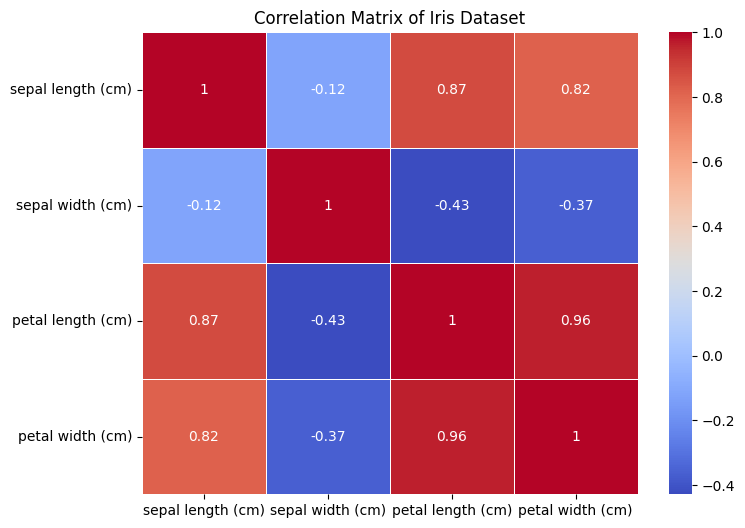

In [12]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Iris Dataset")
plt.show()

#### Correlation matrix shows positive relation which is good.

In [13]:
#lets split our data...
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# Encode the target variable: 1 for "virginica" and 0 for other or "not virginica"
y_binary = np.where(y == 2, 1, 0)

# Split the data into training and testing sets (70% training data and 30% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=4)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
classifier = LogisticRegression(C=1.0,solver='liblinear')
# i choose the value of c as random in float and solver as liblinear as our dataset is small and binary classified.

In [16]:
classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [17]:
y_hat = classifier.predict(X_test)
y_hat

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1])

In [18]:
#lets look at the probability of predicted result
y_prob = classifier.predict_proba(X_test)
y_prob

array([[7.09659346e-02, 9.29034065e-01],
       [9.99978604e-01, 2.13963974e-05],
       [1.70309982e-01, 8.29690018e-01],
       [6.88364259e-02, 9.31163574e-01],
       [1.38407788e-01, 8.61592212e-01],
       [6.97586286e-01, 3.02413714e-01],
       [2.63750621e-01, 7.36249379e-01],
       [9.99996463e-01, 3.53696057e-06],
       [9.99960988e-01, 3.90117979e-05],
       [4.59452983e-01, 5.40547017e-01],
       [9.99878698e-01, 1.21302174e-04],
       [9.99900546e-01, 9.94536960e-05],
       [9.99915791e-01, 8.42086739e-05],
       [6.87210671e-01, 3.12789329e-01],
       [7.47215351e-02, 9.25278465e-01],
       [9.99900097e-01, 9.99033666e-05],
       [8.13941393e-01, 1.86058607e-01],
       [9.99922699e-01, 7.73005313e-05],
       [9.99803822e-01, 1.96178132e-04],
       [3.63128574e-01, 6.36871426e-01],
       [9.99962321e-01, 3.76790465e-05],
       [1.61398495e-01, 8.38601505e-01],
       [5.60249519e-01, 4.39750481e-01],
       [9.99884193e-01, 1.15807233e-04],
       [9.998475

### Lets look at accuracy,classification_report and confusion_matrix of our model

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


#### our model gives us 95% accuracy which is very good.

In [20]:
# Lets look at classification report
report = classification_report(y_test, y_hat)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



Confusion Matrix:
 [[29  2]
 [ 0 14]]


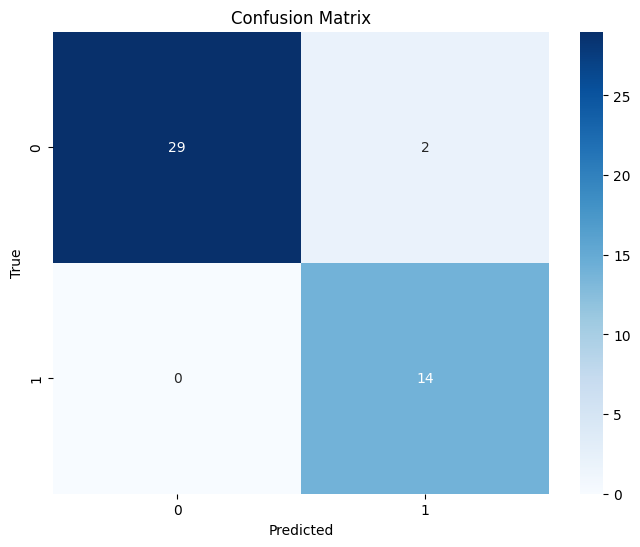

In [21]:
# Lets generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Confusion matrix shows:

### Class 1 (virginica) seems to have been predicted correctly for all samples.
### Class 0 (not virginica) had 2 misclassifications, with 29 correct predictions.

##### Now, let's try log loss for evaluation. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. A lower log loss value indicates better performance, where 0 represents perfect predictions. A higher log loss value suggests that the predicted probabilities are less accurate..

In [22]:
from sklearn.metrics import log_loss
log_loss(y_test, y_prob)

0.1476070855474746

### Can we improve our model !!! Lets play with parameters of logistic regression model ...

### Lets try to build Logistic Regression model again for the same dataset, but this time,we use different __solver__ to see if we can improve accuracy and logloss value

In [23]:
classifier2 = LogisticRegression(C=1.0,solver='sag', max_iter=200).fit(X_train,y_train)
y_hat2 = classifier2.predict(X_test)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [24]:
y_prob2 = classifier2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, y_prob2))

LogLoss: : 0.12


In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_hat2)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


## As we can see accuracy improved by using different solver or playing with parameters of model.